## How to do some GIS using Geopandas: 
#### An introduction for novices, by a novice. 
***Purpose:*** To showcase a clean Jupyter notebook that outputs webmap-ready data (GeoJSON).  This notebook will incorporate Geopandas, and a variety of other Python libraries to import, wrangle, analyze, and export data within a typical data-viz and mapping workflow.

###### Created by Ritchie Katko (rakatk0@uky.edu) for [UKy Geography's New Maps Plus](http://newmapsplus.uky.edu/) MAP675 

##### Objective: 


#### Setting up the environment
Here's my background specs: 
- ***OS***: Ubuntu 16.04.6 LTS
- ***Python version***: `$ /usr/bin/python3 -V` 3.5.2
- ***Anaconda3 version***: `$ conda info` 4.5.11

###### Conda Environment 
The following packages must be installed (`$ conda install`) into the active Conda environment:
- `Jupyter` (allows use of jupyter coding environment
- `Geopandas` (integrates other packages geospatial components) 
- `Matplotlib` (dataviz package - allows plotting of visualizations)

##### after activating the Conda Environment of choice, navigate to the working directory and run `jupyter notebook` to initiate the browser-based notebook environment.  

##### Now, let's get to work: 

##### Add packages to allow for their use in this environment

In [1]:
# import packages, using aliases to simplify code
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, mapping
import sys

##### load local data
    load csv into notebook as dataframe 'df'.  using `type()` will return the type of data. 

In [2]:
# load csv into notebook as dataframe 'df', and check the data  
# path_to_file = './project-files/collisions.csv'
path_to_file = 'https://data.louisvilleky.gov/sites/default/files/KSIPedestrians2009-2018_0.csv'

df = pd.read_csv(path_to_file,  dtype = str) # load csv data as pandas DataFrame, load # dtype = str, 
type(df)

pandas.core.frame.DataFrame

##### take a look at the data, from a few angles

In [3]:
df.shape, df.sample(1)  # shape will return the number of rows, and columns.  .sample() will return a random row

((811, 38),
     IncidentId AgencyORI                    AgencyName IncidentStatusDesc  \
 107   20674072   0568000  LOUISVILLE METRO POLICE DEPT           Accepted   
 
         County RdwyNumber Street   RoadwayName StreetSfx StreetDir  ...  \
 107  JEFFERSON     KY1932    NaN  BRECKENRIDGE        LN       NaN  ...   
 
     DirAnalysisCode MannerofCollision     RdwyCharacter       LightCondition  \
 107             NaN    SINGLE VEHICLE  STRAIGHT & LEVEL  DARK-HWY LIGHTED/ON   
 
     RampFromRdwyId RampToRdwyId AcceptedDate IsSecondaryCollision OwnerBadge  \
 107            NaN          NaN  43013.39598                FALSE       7256   
 
     IncidentStatus  
 107       Accepted  
 
 [1 rows x 38 columns])

In [4]:
df.head(), df.tail()

(  IncidentId AgencyORI                      AgencyName IncidentStatusDesc  \
 0   24436019   0568000    LOUISVILLE METRO POLICE DEPT           Accepted   
 1   24449664   0560300  ST. MATTHEWS POLICE DEPARTMENT           Accepted   
 2   24465922   0568000    LOUISVILLE METRO POLICE DEPT           Accepted   
 3   24435929   0568000    LOUISVILLE METRO POLICE DEPT           Accepted   
 4   24395667   0568000    LOUISVILLE METRO POLICE DEPT           Accepted   
 
       County RdwyNumber Street  RoadwayName StreetSfx StreetDir  ...  \
 0  JEFFERSON    US0031E    NaN    BARDSTOWN        RD       NaN  ...   
 1  JEFFERSON        NaN    117  ST MATTHEWS       AVE       NaN  ...   
 2  JEFFERSON     KY1447    NaN     WESTPORT        RD       NaN  ...   
 3  JEFFERSON        NaN    NaN         35TH        ST         N  ...   
 4  JEFFERSON        NaN    NaN      CENTRAL       AVE       NaN  ...   
 
                                 DirAnalysisCode MannerofCollision  \
 0     COLLISION WIT

In [5]:
list(df.columns) # take a look at all the columns

['IncidentId',
 'AgencyORI',
 'AgencyName',
 'IncidentStatusDesc',
 'County',
 'RdwyNumber',
 'Street',
 'RoadwayName',
 'StreetSfx',
 'StreetDir',
 'IntersectionRdwy',
 'IntersectionRdwyName',
 'BetweenStRdwy1',
 'BetweenStRdwyName1',
 'BetweenStRdwy2',
 'BetweenStRdwyName2',
 'Latitude',
 'Longitude',
 'Milepoint',
 'CollisionDate',
 'CollisionTime',
 'UnitsInvolved',
 'MotorVehiclesInvolved',
 'NumberKilled',
 'NumberInjured',
 'Weather',
 'RdwyConditionCode',
 'HitandRun',
 'DirAnalysisCode',
 'MannerofCollision',
 'RdwyCharacter',
 'LightCondition',
 'RampFromRdwyId',
 'RampToRdwyId',
 'AcceptedDate',
 'IsSecondaryCollision',
 'OwnerBadge',
 'IncidentStatus']

In [6]:
df['Weather'].unique(),df['LightCondition'].unique(), df['NumberInjured'].unique(),df['NumberKilled'].unique()

(array(['CLEAR', 'CLOUDY', 'RAINING', 'SNOWING', 'OTHER',
        'BLOWING SAND/SOIL/DIRT/SNOW', 'SLEET, HAIL, FREEZING RAIN',
        'FOG WITH RAIN'], dtype=object),
 array(['DAYLIGHT', 'DARK-HWY NOT LIGHTED', 'DARK-HWY LIGHTED/ON', 'DUSK',
        'DARK (UNKNOWN ROADWAY LIGHTING)', 'DARK-HWY LIGHTED/OFF', 'DAWN',
        'OTHER'], dtype=object),
 array(['1', '0', '2', '3', '4', '9', '5', '19'], dtype=object),
 array(['0', '1', '2'], dtype=object))

##### are there any columns we don't care about that can be removed?   
Let's simplify this. Taking a look at a key provided for this data.

In [7]:
df = df.drop(columns=[
 'IncidentId',
 'AgencyORI',
 'AgencyName',
 'IncidentStatusDesc',
 'County',
 'RdwyNumber',
 'Street',
 'RoadwayName',
 'StreetSfx',
 'StreetDir',
 'IntersectionRdwy',
 'IntersectionRdwyName',
 'BetweenStRdwy1',
 'BetweenStRdwyName1',
 'BetweenStRdwy2',
 'BetweenStRdwyName2',
#  'Latitude',
#  'Longitude',
 'Milepoint',
 'CollisionDate',
 'CollisionTime',
 'UnitsInvolved',
 'MotorVehiclesInvolved',
#  'NumberKilled',
#  'NumberInjured',
 'Weather',
 'RdwyConditionCode',
#  'HitandRun',
 'DirAnalysisCode',
 'MannerofCollision',
 'RdwyCharacter',
 'LightCondition',
 'RampFromRdwyId',
 'RampToRdwyId',
 'AcceptedDate',
 'IsSecondaryCollision',
 'OwnerBadge',
 'IncidentStatus'])

In [8]:
type(df.Latitude[0])

str

In [9]:
type(df.NumberKilled[0])

str

In [10]:
list(df.columns)

['Latitude', 'Longitude', 'NumberKilled', 'NumberInjured', 'HitandRun']

In [11]:
df.head(), df.tail()

(      Latitude     Longitude NumberKilled NumberInjured HitandRun
 0  38.23855613  -85.72115038            0             1     FALSE
 1  38.25275058  -85.65253997            0             1     FALSE
 2  38.28602118   -85.5776082            1             0     FALSE
 3  38.27045314  -85.80489266            1             0     FALSE
 4  38.21074622  -85.77960742            0             1     FALSE,
        Latitude     Longitude NumberKilled NumberInjured HitandRun
 806  38.1685645   -85.6045401            0             1     FALSE
 807  38.1715718   -85.7677914            0             1     FALSE
 808  38.2146149   -85.7236772            0             1     FALSE
 809    38.26975  -85.78851667            0             1     FALSE
 810  38.2009692   -85.6630691            0             1     FALSE)

##### after taking a look at the data and identifying some coordinates, further inspect the geometry columns.

These are labeled `xcoord` and `ycoord`.  Let's figure out what type of data this is using `type()`


In [12]:
# check datatypes
type(df.Latitude[1]), type(df.Longitude[1]), type(df.NumberKilled[1]), type(df.NumberInjured[1]), type(df.HitandRun[1]) # str

(str, str, str, str, str)

##### since these are strings, removing extra spaces that may be lingering is necessary before converting over to a numerical type

In [13]:
#remove extra spaces in strings
df.Latitude = df.Latitude.map(str.strip)  
df.Longitude = df.Longitude.map(str.strip)
df.NumberKilled = df.NumberKilled.map(str.strip)
df.NumberInjured = df.NumberInjured.map(str.strip)

In [14]:
# lets look at the first 5 rows of data in this column
df.Latitude.head(), df.Longitude.head()  

(0    38.23855613
 1    38.25275058
 2    38.28602118
 3    38.27045314
 4    38.21074622
 Name: Latitude, dtype: object, 0    -85.72115038
 1    -85.65253997
 2     -85.5776082
 3    -85.80489266
 4    -85.77960742
 Name: Longitude, dtype: object)

In [15]:
# check to see what the most common value
# .idxmax() returns the most common value in a column
df.Latitude.value_counts().idxmax(), df.Longitude.value_counts().idxmax() 

('38.20166667', '-85.53666667')

##### after identifying the cell value that indicates ***not geocoded***,  now remove ungeocoded cells from the dataframe

In [16]:
# replace empty strings with NaN
df.Longitude.replace('', np.nan, inplace=True)
df.Latitude.replace('', np.nan, inplace=True)
df.NumberKilled.replace('', np.nan, inplace=True)
df.NumberInjured.replace('', np.nan, inplace=True)
df.shape # check number of rows here for comparison with result of next step

(811, 5)

In [17]:
# Now drop the null values
df.dropna(subset=['Longitude'], inplace=True)
df.dropna(subset=['Latitude'], inplace=True)
df.dropna(subset=['NumberKilled'], inplace=True)
df.dropna(subset=['NumberInjured'], inplace=True)
df.shape # check number of rows here for comparison with result of previous step to verify removal

(811, 5)

In [18]:
# to be useful later, we need numerical values (for now, integers), not Strings. Converting the coordinates into numerical values is paramount. 
# convert strings to integers
df.Longitude = pd.to_numeric(df.Longitude, errors='ignore')
df.Latitude = pd.to_numeric(df.Latitude, errors='ignore')
df.NumberKilled = pd.to_numeric(df.NumberKilled, errors='ignore')
df.NumberInjured = pd.to_numeric(df.NumberInjured, errors='ignore')


In [19]:
type(df.NumberInjured[1])

numpy.int64

#### save as json

In [20]:
# stash the data locally as json
with open('./project-files/collisions.json', 'w') as f:
    f.write(df.to_json())

##### now verify the file was written 

In [21]:
# imports the OS module, using the .walk() method returns information about the current working directory. 
import os
for root, dirs, files in os.walk('./project-files/'):
    for filename in files:
        print(filename)

collisions-4326.json
collisions.csv
collisions.json
Council_Districts.zip
districts-fatal-4326.json
council_districts.cpg
council_districts.dbf
council_districts.prj
council_districts.qpj
council_districts.shp
council_districts.shx


#### JSON will soon become a geojson...

##### access JSON that we created and stashed locally and load as dataframe

In [22]:
path_to_file = './project-files/collisions.json'
df = pd.read_json(path_to_file) # load csv data as pandas DataFrame
type(df), df.head()

(pandas.core.frame.DataFrame,
     Latitude  Longitude  NumberKilled  NumberInjured HitandRun
 0  38.238556 -85.721150             0              1     FALSE
 1  38.252751 -85.652540             0              1     FALSE
 2  38.286021 -85.577608             1              0     FALSE
 3  38.270453 -85.804893             1              0     FALSE
 4  38.210746 -85.779607             0              1     FALSE)

##### create the geometry...
Louisville made it easy and provided lat/longs, so we can   

In [23]:
# create geometry using Shapely Point & assign proper projection
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
# df = df.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}
collisions = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
collisions.head()

,Latitude,Longitude,NumberKilled,NumberInjured,HitandRun,geometry
0,38.238556,-85.721150,0,1,FALSE,POINT (-85.72115038 38.23855613)
1,38.252751,-85.652540,0,1,FALSE,POINT (-85.65253997000001 38.25275058)
2,38.286021,-85.577608,1,0,FALSE,POINT (-85.5776082 38.28602118)
3,38.270453,-85.804893,1,0,FALSE,POINT (-85.80489265999999 38.27045314)
4,38.210746,-85.779607,0,1,FALSE,POINT (-85.77960742 38.21074622)


In [24]:
with open('./project-files/collisions-4326.json', 'w') as f:
    f.write(collisions.to_json())

#### now we need to count points within polygons.  we'll do this 2 ways


In [25]:
polys = gpd.read_file(r"./data/council-districts.json")
points = gpd.read_file(r"./project-files/collisions-4326.json")

dfsjoin = gpd.sjoin(polys,points) #Spatial join Points to polygons
dfpivot = pd.pivot_table(dfsjoin,index='objectid',columns='NumberKilled',aggfunc={'NumberKilled':len})
dfpivot.columns = dfpivot.columns.droplevel()

df = polys.merge(dfpivot, how='left',on='objectid')

In [26]:
df

,objectid,coundist,coun_party,geometry,0,1,2
0,1,1,D,"POLYGON ((-85.80240000000001 38.2497, -85.8024...",20.0,5.0,NaN
1,2,2,D,"POLYGON ((-85.62609999999999 38.1862, -85.6262...",23.0,12.0,NaN
2,3,3,D,"POLYGON ((-85.78360000000001 38.205, -85.78360...",46.0,17.0,1.0
3,4,4,D,"POLYGON ((-85.7354 38.2704, -85.73 38.2636, -8...",80.0,13.0,NaN
4,5,5,D,"POLYGON ((-85.7612 38.2721, -85.7718 38.2634, ...",37.0,6.0,NaN
5,6,6,D,"POLYGON ((-85.7516 38.2201, -85.7517 38.2198, ...",47.0,12.0,NaN
6,7,7,R,"POLYGON ((-85.59269999999999 38.3004, -85.5925...",11.0,3.0,1.0
7,8,8,D,"POLYGON ((-85.6583 38.2222, -85.65819999999999...",32.0,2.0,NaN
8,9,9,D,"POLYGON ((-85.63930000000001 38.2516, -85.6395...",28.0,1.0,NaN
9,10,10,D,"POLYGON ((-85.6713 38.2113, -85.6712 38.2112, ...",19.0,3.0,NaN


In [27]:
df.fillna(0)

,objectid,coundist,coun_party,geometry,0,1,2
0,1,1,D,"POLYGON ((-85.80240000000001 38.2497, -85.8024...",20.0,5.0,0.0
1,2,2,D,"POLYGON ((-85.62609999999999 38.1862, -85.6262...",23.0,12.0,0.0
2,3,3,D,"POLYGON ((-85.78360000000001 38.205, -85.78360...",46.0,17.0,1.0
3,4,4,D,"POLYGON ((-85.7354 38.2704, -85.73 38.2636, -8...",80.0,13.0,0.0
4,5,5,D,"POLYGON ((-85.7612 38.2721, -85.7718 38.2634, ...",37.0,6.0,0.0
5,6,6,D,"POLYGON ((-85.7516 38.2201, -85.7517 38.2198, ...",47.0,12.0,0.0
6,7,7,R,"POLYGON ((-85.59269999999999 38.3004, -85.5925...",11.0,3.0,1.0
7,8,8,D,"POLYGON ((-85.6583 38.2222, -85.65819999999999...",32.0,2.0,0.0
8,9,9,D,"POLYGON ((-85.63930000000001 38.2516, -85.6395...",28.0,1.0,0.0
9,10,10,D,"POLYGON ((-85.6713 38.2113, -85.6712 38.2112, ...",19.0,3.0,0.0


In [28]:
df.columns = ['objectid','coundist','coun_party','geometry','nofatality','fatality','2xfatality']

In [29]:
df = df.astype({'nofatality': int})
df['nofatality'] = df['nofatality'].apply(str)

In [30]:
df = df.astype({"fatality": int})
df['fatality'] = df['fatality'].apply(str)

In [31]:
df = df.fillna(0)

In [33]:
df = df.astype({"2xfatality": int})
df['2xfatality'] = df['2xfatality'].apply(str)

In [34]:
a = df['2xfatality'][0]
type(a)

str

##### convert to geodataframe and reproject data to web-map ready EPSG:4326

In [35]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs)
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [36]:
gdf

,objectid,coundist,coun_party,geometry,nofatality,fatality,2xfatality
0,1,1,D,"POLYGON ((-85.80240000000001 38.2497, -85.8024...",20,5,0
1,2,2,D,"POLYGON ((-85.62609999999999 38.1862, -85.6262...",23,12,0
2,3,3,D,"POLYGON ((-85.78360000000001 38.205, -85.78360...",46,17,1
3,4,4,D,"POLYGON ((-85.7354 38.2704, -85.73 38.2636, -8...",80,13,0
4,5,5,D,"POLYGON ((-85.7612 38.2721, -85.7718 38.2634, ...",37,6,0
5,6,6,D,"POLYGON ((-85.7516 38.2201, -85.7517 38.2198, ...",47,12,0
6,7,7,R,"POLYGON ((-85.59269999999999 38.3004, -85.5925...",11,3,1
7,8,8,D,"POLYGON ((-85.6583 38.2222, -85.65819999999999...",32,2,0
8,9,9,D,"POLYGON ((-85.63930000000001 38.2516, -85.6395...",28,1,0
9,10,10,D,"POLYGON ((-85.6713 38.2113, -85.6712 38.2112, ...",19,3,0


In [37]:
with open('./project-files/districts-fatal-4326.json', 'w') as f:
    f.write(gdf.to_json())

##### visualize the data (are we mapping yet?), but first we'll need to import some plotting tools. 

In [38]:
# import plotter 
%matplotlib inline

import matplotlib.pyplot as plt
# change default figsize
plt.rcParams['figure.figsize'] = (30, 24)

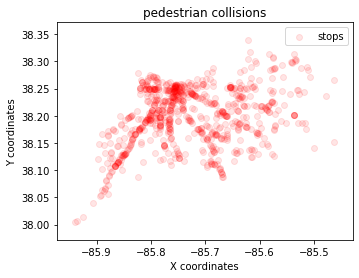

In [39]:
fig, ax = plt.subplots()
 
base_color = '#f0f0f0'
border_color = base_color
 
collisions.plot(ax=ax, color='red', alpha=0.1, zorder=0, label='stops');
# gdf.plot(ax=ax, color='red', alpha=0.1, zorder=0, label='collision');  #low opacity adds a heatmap effect at this scale.  unintentional
 
ax.set(title="pedestrian collisions",
       xlabel="X coordinates",
       ylabel="Y coordinates") 
ax.legend();

#### its alive!  bring in some other data to see if everything appears to be in order

##### first double-check the CRS on the data

In [40]:
#export as geojson 
### throws an error unless file is deleted prior
gdf.to_file(r'./data/districts-fatal.geojson', driver="GeoJSON")

In [41]:
#export as geojson 
### throws an error unless file is deleted prior
collisions.to_file(r'./data/collisions.geojson', driver="GeoJSON")

In [42]:
#double check the data
for root, dirs, files in os.walk('./data/'):
    for filename in files:
        print(filename)

collisions.geojson
council-districts.json
districts-fatal.geojson


##### export notebook to HTML

In [43]:
!jupyter nbconvert --to html lou-collisions-wrangling.ipynb

[NbConvertApp] Converting notebook lou-collisions-wrangling.ipynb to html
[NbConvertApp] Writing 398836 bytes to lou-collisions-wrangling.html
